### Analysis WITH SAND (coarse GSD)
Each individual csv file is an individual sediment basket

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# directory where the CSV files are located
folder_path = "with_sand"

# list all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# loop through each CSV file and read it into a DataFrame and create variables
for csv_file in csv_files:
    file_name = os.path.splitext(csv_file)[0]  # Get the file name without the extension
    file_path = os.path.join(folder_path, csv_file)
    # create a variable with the file name and store the DataFrame
    exec(f"{file_name} = pd.read_csv(file_path)")


Calculate statistical values for confidence intervals: (note - I did this linearly, consider converting to phi scale, interpolate and convert back to mm)

In [2]:
import numpy as np
# list of desired percentiles (from 5 to 95 in intervals of 5)
percentiles = list(range(5, 100, 5))
# inverting the dataframe so interpolation doesnt explode
percent_finer = percent_finer[::-1]
percent_finer.set_index("Sieve Size (mm)", inplace=True)

# interpolate the data to calculate percentiles
percentile_values = pd.DataFrame() # empty df
percentile_values['Percentiles'] = percentiles # changing the column name
percentile_values.set_index("Percentiles", inplace=True) # make it the index

for column_name in percent_finer.columns: 
    interp = np.interp(percentiles, percent_finer[column_name], percent_finer.index)
    percentile_values[column_name] = interp


In [3]:
# will now get the standard deviation for each 
means = []
for column_name in percentile_values.columns: 
    mean_size = percentile_values[column_name].mean() # calculate the mean for each column
    means.append(mean_size)

means = pd.DataFrame(means).T
means.index = ['average grain size (mm)']
means.columns = percentile_values.columns

# get the squared differences
variances = []
for column_name in percentile_values.columns:
    value_to_subtract = means.at['average grain size (mm)', column_name]
    sqdiff = (percentile_values[column_name] - value_to_subtract)**2
    variance = np.mean(sqdiff)
    variances.append(variance)

std = np.sqrt(variances) 
print(std)

standard_dev = pd.DataFrame(std).T
standard_dev.index = ['standard deviation']
standard_dev.columns = percentile_values.columns

[1.37588891 1.42526122 1.42004734 1.32168942 1.41162726 1.3527325
 1.41828002 1.42695715 1.42752235 1.36314278 1.44036954 1.4338885
 1.39048556 1.43184448 1.41177785 1.42993126 1.41513576 1.41293269
 1.40284874 1.36738704 1.39262939 1.4101549  1.41498022]


In [4]:
std_df = percentile_values.copy()
for column_name in percentile_values.columns:
    value_to_change = standard_dev.at['standard deviation', column_name]
    std_df[column_name] = value_to_change

upper_limit = percentile_values + std_df
lower_limit = percentile_values - std_df

GSD plot: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


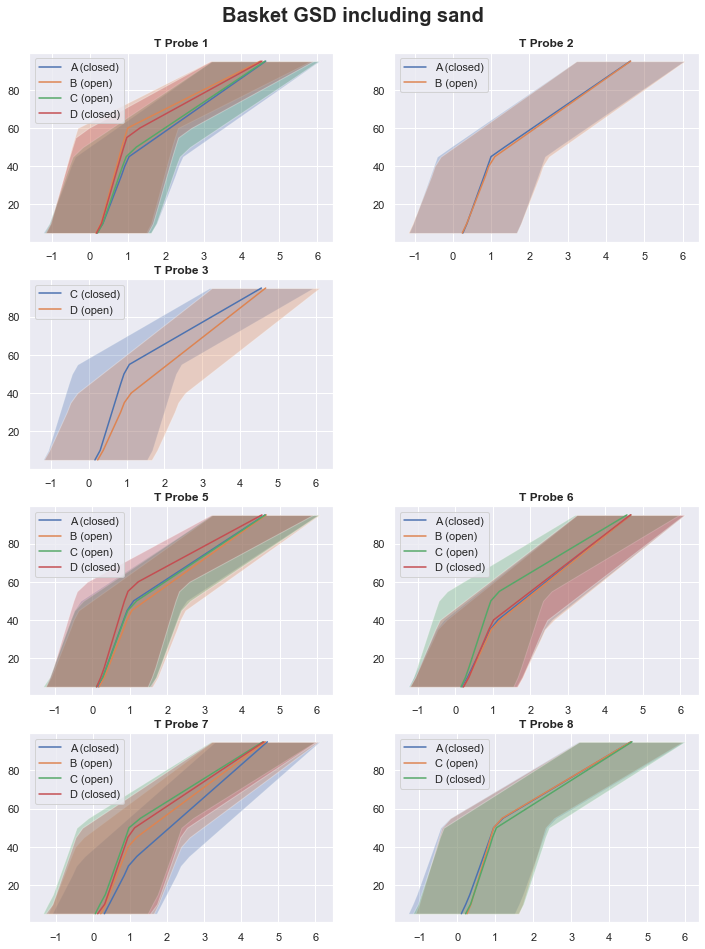

In [46]:
# sort the DataFrame by sieve size
df = percentile_values
#.sort_values(by='Sieve Size (mm)') # we do this or else it will look mirrored
sns.set_theme()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]
ax7 = axes[3, 0]
ax8 = axes[3, 1]

# T1 (25)
ax1.plot(df['T25A'], df.index, label='A (closed)')
ax1.fill_betweenx(df.index, lower_limit['T25A'], upper_limit['T25A'], alpha=0.3)
ax1.plot(df['T25B'], df.index, label='B (open)')
ax1.fill_betweenx(df.index, lower_limit['T25B'], upper_limit['T25B'], alpha=0.3)
ax1.plot(df['T25C'], df.index, label='C (open)')
ax1.fill_betweenx(df.index, lower_limit['T25C'], upper_limit['T25C'], alpha=0.3)
ax1.plot(df['T25D'], df.index, label='D (closed)')
ax1.fill_betweenx(df.index, lower_limit['T25D'], upper_limit['T25D'], alpha=0.3)

# T2 (8)
ax2.plot(df['T8A'], df.index, label='A (closed)')
ax2.fill_betweenx(df.index, lower_limit['T8A'], upper_limit['T8A'], alpha=0.3)
ax2.plot(df['T8B'], df.index, label='B (open)')
ax2.fill_betweenx(df.index, lower_limit['T8B'], upper_limit['T8B'], alpha=0.3)

# T3 (0)
ax3.plot(df['T0C'], df.index, label='C (closed)')
ax3.fill_betweenx(df.index, lower_limit['T0C'], upper_limit['T0C'], alpha=0.3)
ax3.plot(df['T0D'], df.index, label='D (open)')
ax3.fill_betweenx(df.index, lower_limit['T0D'], upper_limit['T0D'], alpha=0.3)

# T5 (4)
ax5.plot(df['T4A'], df.index, label='A (closed)')
ax5.fill_betweenx(df.index, lower_limit['T4A'], upper_limit['T4A'], alpha=0.3)
ax5.plot(df['T4B'], df.index, label='B (open)')
ax5.fill_betweenx(df.index, lower_limit['T4B'], upper_limit['T4B'], alpha=0.3)
ax5.plot(df['T4C'], df.index, label='C (open)')
ax5.fill_betweenx(df.index, lower_limit['T4C'], upper_limit['T4C'], alpha=0.3)
ax5.plot(df['T4D'], df.index, label='D (closed)')
ax5.fill_betweenx(df.index, lower_limit['T4D'], upper_limit['T4D'], alpha=0.3)

# T6 (5)
ax6.plot(df['T5A'], df.index, label='A (closed)')
ax6.fill_betweenx(df.index, lower_limit['T5A'], upper_limit['T5A'], alpha=0.3)
ax6.plot(df['T5B'], df.index, label='B (open)')
ax6.fill_betweenx(df.index, lower_limit['T5B'], upper_limit['T5B'], alpha=0.3)
ax6.plot(df['T5C'], df.index, label='C (open)')
ax6.fill_betweenx(df.index, lower_limit['T5C'], upper_limit['T5C'], alpha=0.3)
ax6.plot(df['T5D'], df.index, label='D (closed)')
ax6.fill_betweenx(df.index, lower_limit['T5D'], upper_limit['T5D'], alpha=0.3)

# T7 (6)
ax7.plot(df['T6A'], df.index, label='A (closed)')
ax7.fill_betweenx(df.index, lower_limit['T6A'], upper_limit['T6A'], alpha=0.3)
ax7.plot(df['T6B'], df.index, label='B (open)')
ax7.fill_betweenx(df.index, lower_limit['T6B'], upper_limit['T6B'], alpha=0.3)
ax7.plot(df['T6C'], df.index, label='C (open)')
ax7.fill_betweenx(df.index, lower_limit['T6C'], upper_limit['T6C'], alpha=0.3)
ax7.plot(df['T6D'], df.index, label='D (closed)')
ax7.fill_betweenx(df.index, lower_limit['T6D'], upper_limit['T6D'], alpha=0.3)

# T8 (7)
ax8.plot(df['T7A'], df.index, label='A (closed)')
ax8.fill_betweenx(df.index, lower_limit['T7A'], upper_limit['T7A'], alpha=0.3)
ax8.plot(df['T7C'], df.index, label='C (open)')
ax8.fill_betweenx(df.index, lower_limit['T7C'], upper_limit['T7C'], alpha=0.3)
ax8.plot(df['T7D'], df.index, label='D (closed)')
ax8.fill_betweenx(df.index, lower_limit['T7D'], upper_limit['T7D'], alpha=0.3)


# set labels, title, scale and set the same y-axis limits for all subplots
title_font = {'weight': 'bold', 'size': 12}
fig.delaxes(ax4)
fig.suptitle('Basket GSD including sand', fontsize=20, fontweight='bold', x=0.5, y=0.92)
min_y = min(df.min())
max_y = max(df.max())
for i, ax in enumerate(axes.flat):
    ax.set_title(f'T Probe {i + 1}', fontdict=title_font)
    ax.legend(loc='best')
    #ax.set_xscale('log')
    #ax.set_ylim(min_y, max_y)

# show the plot
plt.savefig('GSD_withsand.png')
plt.show()


In [14]:
df

,T0C,T0D,T25A,T25B,T25C,T25D,T4A,T4B,T4C,T4D,...,T5D,T6A,T6B,T6C,T6D,T7A,T7C,T7D,T8A,T8B
Percentiles,,,,,,,,,,,,,,,,,,,,,
5,0.162613,0.235604,0.184409,0.164639,0.204638,0.176760,0.152936,0.175544,0.104729,0.112514,...,0.220065,0.304719,0.208543,0.060595,0.125233,0.104846,0.254918,0.217320,0.261483,0.246790
10,0.300350,0.380651,0.347008,0.294718,0.344353,0.309018,0.274714,0.320682,0.277345,0.223595,...,0.360695,0.438418,0.336406,0.190850,0.313786,0.222867,0.357786,0.348907,0.369461,0.364044
15,0.378282,0.495943,0.444380,0.364897,0.430937,0.381986,0.370754,0.422158,0.373779,0.314784,...,0.467269,0.572118,0.437470,0.330869,0.403521,0.328073,0.432321,0.432542,0.459589,0.462049
20,0.456214,0.611236,0.541753,0.433374,0.517522,0.454955,0.463312,0.523635,0.467702,0.391941,...,0.573843,0.705817,0.538534,0.422802,0.493257,0.418353,0.506855,0.516177,0.549716,0.560054
25,0.534146,0.726528,0.639125,0.501851,0.604106,0.527924,0.555870,0.625112,0.561624,0.469098,...,0.680417,0.839516,0.639599,0.514735,0.582992,0.508633,0.581389,0.599811,0.639844,0.658060
30,0.612079,0.841820,0.736498,0.570328,0.690690,0.600893,0.648428,0.726589,0.655547,0.546255,...,0.786990,0.956285,0.740663,0.606667,0.672727,0.598913,0.655923,0.683446,0.729972,0.756065
35,0.690011,0.939569,0.833870,0.638805,0.777274,0.673861,0.740986,0.828066,0.749470,0.623412,...,0.895505,1.182353,0.841727,0.698600,0.762462,0.689193,0.730458,0.767080,0.820100,0.853521
40,0.767943,1.120641,0.922235,0.707282,0.865447,0.746830,0.833544,0.922080,0.843392,0.700569,...,1.020335,1.476018,0.947797,0.790533,0.852152,0.779473,0.804992,0.850662,0.908973,0.938307
45,0.845875,1.443921,1.036668,0.775759,0.961960,0.819799,0.928949,1.054744,0.945969,0.777726,...,1.351974,1.769684,1.177207,0.881733,0.940053,0.868856,0.880171,0.928151,0.997225,1.096653


### Analysis NO SAND

In [5]:
# directory where the CSV files are located
folder_path = "no_sand"

# list all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# loop through each CSV file and read it into a DataFrame and create variables
for csv_file in csv_files:
    file_name = os.path.splitext(csv_file)[0]  # Get the file name without the extension
    file_path = os.path.join(folder_path, csv_file)
    # create a variable with the file name and store the DataFrame
    exec(f"{file_name} = pd.read_csv(file_path)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


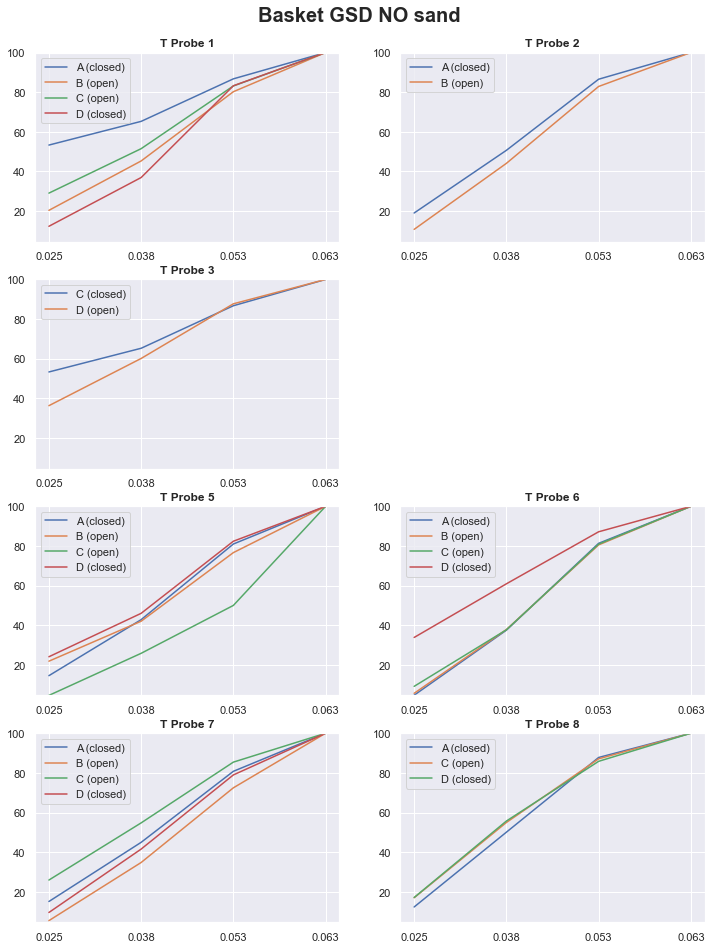

In [10]:
# sort the DataFrame by sieve size
df = percent_finer_nosand.sort_values(by='Sieve Size (mm)') # we do this or else it will look mirrored
df.set_index("Sieve Size (mm)", inplace=True)
df = df.iloc[:4]
sns.set_theme()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]
ax7 = axes[3, 0]
ax8 = axes[3, 1]

# T1 (25)
ax1.plot(df['T25A'], label='A (closed)')
ax1.plot(df['T25B'], label='B (open)')
ax1.plot(df['T25C'], label='C (open)')
ax1.plot(df['T25D'], label='D (closed)')

# T2 (8)
ax2.plot(df['T8A'], label='A (closed)')
ax2.plot(df['T8B'], label='B (open)')

# T3 (0)
ax3.plot(df['T0C'], label='C (closed)')
ax3.plot(df['T0D'], label='D (open)')

# T5 (4)
ax5.plot(df['T4A'], label='A (closed)')
ax5.plot(df['T4B'], label='B (open)')
ax5.plot(df['T4C'], label='C (open)')
ax5.plot(df['T4D'], label='D (closed)')

# T6 (5)
ax6.plot(df['T5A'], label='A (closed)')
ax6.plot(df['T5B'], label='B (open)')
ax6.plot(df['T5C'], label='C (open)')
ax6.plot(df['T5D'], label='D (closed)')


# T7 (6)
ax7.plot(df['T6A'], label='A (closed)')
ax7.plot(df['T6B'], label='B (open)')
ax7.plot(df['T6C'], label='C (open)')
ax7.plot(df['T6D'], label='D (closed)')


# T8 (7)
ax8.plot(df['T7A'], label='A (closed)')
ax8.plot(df['T7C'], label='C (open)')
ax8.plot(df['T7D'], label='D (closed)')


# set labels, title, scale and set the same y-axis limits for all subplots
title_font = {'weight': 'bold', 'size': 12}
fig.delaxes(ax4)
fig.suptitle('Basket GSD NO sand', fontsize=20, fontweight='bold', x=0.5, y=0.92)
min_y = min(df.min())
max_y = max(df.max())
for i, ax in enumerate(axes.flat):
    ax.set_title(f'T Probe {i + 1}', fontdict=title_font)
    ax.legend(loc='best')
    #ax.set_xscale('log')
    ax.set_ylim(min_y, max_y)

# show the plot
plt.show()

Lastly, we will also conduct the same analysis with the grain size distributions obtained with the LISST portable
### LISST: 

In [16]:
# directory where the CSV files are located
folder_path = "LISST"

# list all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# loop through each CSV file and read it into a DataFrame and create variables
for csv_file in csv_files:
    file_name = os.path.splitext(csv_file)[0]  # Get the file name without the extension
    file_path = os.path.join(folder_path, csv_file)
    # create a variable with the file name and store the DataFrame
    exec(f"{file_name} = pd.read_csv(file_path)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


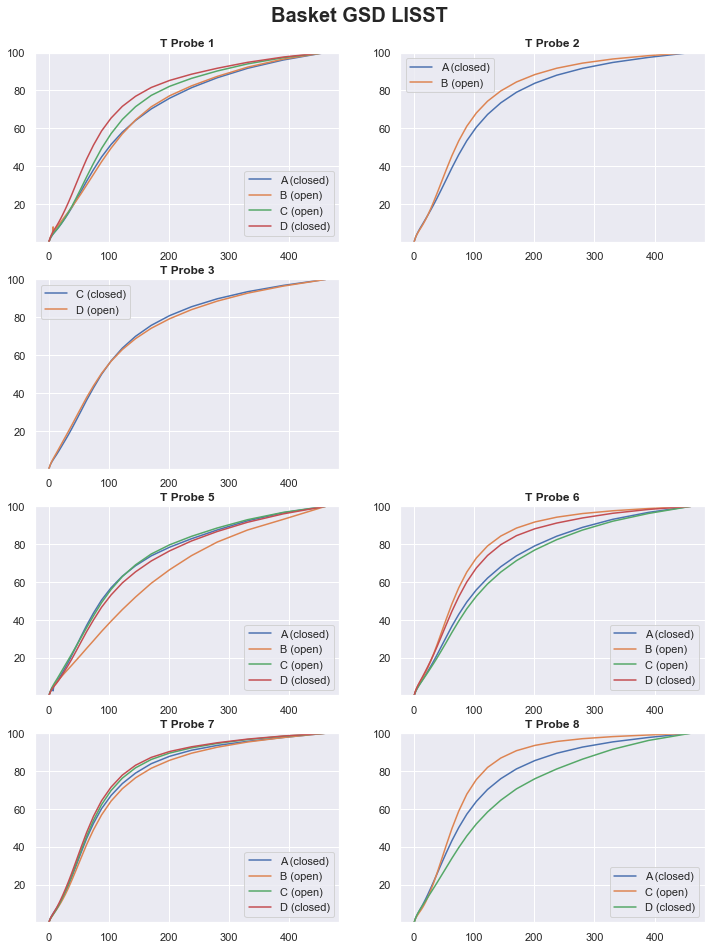

In [17]:
# sort the DataFrame by sieve size
df = LISST_cumconc
#.sort_values(by='Sieve Size (mm)') # we do this or else it will look mirrored
df.set_index("Size (um)", inplace=True)
sns.set_theme()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]
ax7 = axes[3, 0]
ax8 = axes[3, 1]

# T1 (25)
ax1.plot(df['T25A'], label='A (closed)')
ax1.plot(df['T25B'], label='B (open)')
ax1.plot(df['T25C'], label='C (open)')
ax1.plot(df['T25D'], label='D (closed)')

# T2 (8)
ax2.plot(df['T8A'], label='A (closed)')
ax2.plot(df['T8B'], label='B (open)')

# T3 (0)
ax3.plot(df['T0C'], label='C (closed)')
ax3.plot(df['T0D'], label='D (open)')

# T5 (4)
ax5.plot(df['T4A'], label='A (closed)')
ax5.plot(df['T4B'], label='B (open)')
ax5.plot(df['T4C'], label='C (open)')
ax5.plot(df['T4D'], label='D (closed)')

# T6 (5)
ax6.plot(df['T5A'], label='A (closed)')
ax6.plot(df['T5B'], label='B (open)')
ax6.plot(df['T5C'], label='C (open)')
ax6.plot(df['T5D'], label='D (closed)')


# T7 (6)
ax7.plot(df['T6A'], label='A (closed)')
ax7.plot(df['T6B'], label='B (open)')
ax7.plot(df['T6C'], label='C (open)')
ax7.plot(df['T6D'], label='D (closed)')


# T8 (7)
ax8.plot(df['T7A'], label='A (closed)')
ax8.plot(df['T7C'], label='C (open)')
ax8.plot(df['T7D'], label='D (closed)')


# set labels, title, scale and set the same y-axis limits for all subplots
title_font = {'weight': 'bold', 'size': 12}
fig.delaxes(ax4)
fig.suptitle('Basket GSD LISST', fontsize=20, fontweight='bold', x=0.5, y=0.92)
min_y = min(df.min())
max_y = max(df.max())
for i, ax in enumerate(axes.flat):
    ax.set_title(f'T Probe {i + 1}', fontdict=title_font)
    ax.legend(loc='best')
    #ax.set_xscale('log')
    ax.set_ylim(min_y, max_y)

# show the plot
plt.show()

## Hypothesis test from Brett C. Eaton (2019) for binned data

In [ ]:
import numpy as np

def generate_bootstrap_sample(cumulative_freq, num_samples):
    uniform_random_numbers = np.random.rand(num_samples)
    interpolated_samples = np.interp(uniform_random_numbers, cumulative_freq['Cumulative_Frequency'], cumulative_freq['Grain_Diameters'])
    return interpolated_samples

def calculate_percentile_difference(x, y):
    dP_x = np.percentile(x, desired_percentile)
    dP_y = np.percentile(y, desired_percentile)
    return dP_x - dP_y

def binned_data_hypothesis_test(cumulative_freq_x, cumulative_freq_y, nr, alpha, desired_percentile):
    differences = []
    
    for _ in range(nr):
        x_bootstrap = generate_bootstrap_sample(cumulative_freq_x, len(cumulative_freq_x))
        y_bootstrap = generate_bootstrap_sample(cumulative_freq_y, len(cumulative_freq_y))
        difference = calculate_percentile_difference(x_bootstrap, y_bootstrap)
        differences.append(difference)

    lower_quantile = (alpha / 2) * 100
    upper_quantile = (1 - alpha / 2) * 100
    confidence_interval = (np.percentile(differences, lower_quantile), np.percentile(differences, upper_quantile))
    
    return confidence_interval

# Example usage:
# Replace these with your actual cumulative frequency data frames and desired parameters.
cumulative_freq_x = {'Cumulative_Frequency': [0.1, 0.4, 0.7, 0.9], 'Grain_Diameters': [1.0, 2.0, 3.0, 4.0]}
cumulative_freq_y = {'Cumulative_Frequency': [0.15, 0.35, 0.65, 0.85], 'Grain_Diameters': [0.5, 1.5, 2.5, 3.5]}

nr = 1000
alpha = 0.05
desired_percentile = 50  # Change this to the desired percentile value

confidence_interval = binned_data_hypothesis_test(cumulative_freq_x, cumulative_freq_y, nr, alpha, desired_percentile)
print("Confidence Interval:", confidence_interval)

# Test the null hypothesis
if confidence_interval[0] > 0 or confidence_interval[1] < 0:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")